In [30]:
import cv2
import pandas as pd
import numpy as np
import os
import config
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

from PIL import ImageDraw
from img_toolkit.face_bbox_cropper import FaceBboxCropper
import pdb
import json

In [ ]:
df = pd.read_csv('dataset/BP4D_comprehensive.csv')

In [ ]:
images = []
aus = ['1', '2', '4', '9', '10', '11', '12', '14', '15', '17', '23', '24']

aus_description = ['Inner Brow Raiser','Outer Brow Raiser','Brow Lowerer','Nose Wrinkler',
                  'Upper Lip Raiser','Nasolabial Deepener','Lip Corner Puller',
                  '	Dimpler','Lip Corner Depressor','Chin Raiser','Lip Tightener',
                  'Lip Pressor']

for au in aus:
    temp = df.loc[(df[au]==1) & (df.participant!='F001')]
    img_path = temp.iloc[np.random.randint(len(temp))].path
    images.append(img_path)
    

In [ ]:
fig = plt.figure(figsize=(10,15))
for i,image in enumerate(images):
    img =Image.open(config.DATA_ROOT_PATH+image)
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.imshow(img)

In [ ]:

box_obj = FaceBboxCropper()
fig = plt.figure(figsize=(10,100))
i=1
for au,au_d,image in zip(aus,aus_description,images):
    #image = cv2.imread(config.DATA_ROOT_PATH+image)
    boxes,image = box_obj.get_bboxes(image)
    box_s = boxes[int(au)]
    #box_s= np.squeeze(box_s)
    #pdb.set_trace()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
        
    for box in box_s:
        img =image.copy()
        cv2.rectangle(img,tuple(box[0]),tuple(box[1]),(255,0,0),7)
        plt.subplot(14,1,i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(au_d)
        i+=1
#     else:
#         #pdb.set_trace()
#         cv2.rectangle(image,tuple(box_s[0]),tuple(box_s[1]),(255,0,0),4)
#         plt.subplot(14,1,i)
#         plt.imshow(image)
#         plt.title(au_d)
#         i+=1

In [ ]:
box_s

In [ ]:
boxes

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(image)
marks = np.array(list(landmarks.values()))
plt.scatter(marks[:,0],marks[:,1],color='r',s=50)
[plt.annotate(i,(marks[i,0],marks[i,1]),color='w',size=18) for i in range(len(marks))]
plt.show()

In [22]:
ious = np.zeros((4,2))
ious[[0,1],0]=[0.7,0.9]
ious[2,1]=0.8
ithrs = np.linspace(0.05,0.95,5)
dts = np.array([10,20,30,40])
gts = [1,2]
dtm = np.zeros((5,4))
gtm = np.zeros((5,2))


In [23]:
for i,t in enumerate(ithrs):
    for j,d in enumerate(dts):
        iou =t
        m=-1
        for k,g in enumerate(gts):
            if gtm[i,k]>0:
                continue
            if m>-1:
                break
            if ious[j,k]<iou:
                continue
            iou = ious[j,k]
            m= k
        if m==-1:
            continue
        dtm[i,j] = gts[m]
        gtm[i,m] = dts[j]
            

In [24]:
dtm

array([[1., 0., 2., 0.],
       [1., 0., 2., 0.],
       [1., 0., 2., 0.],
       [0., 1., 2., 0.],
       [0., 0., 0., 0.]])

In [25]:
gtm

array([[10., 30.],
       [10., 30.],
       [10., 30.],
       [20., 30.],
       [ 0.,  0.]])

In [3]:
data = json.load(open('preprocess1.json'))

In [5]:
list(data.keys())[10]

'BP4D/data/F001/T1/2450.jpg'

In [46]:
path = 'BP4D/data/F015/T4/1828.jpg'
img_data = data[path]
prefix = '/data/datasets/users/subhash/BP4D/data_processed/'
image = Image.open(prefix+path)
draw = ImageDraw.Draw(image)
box_s = list(img_data['boxes'].values())

In [47]:
for box in box_s:  
    box = [tuple(box[0]),tuple(box[1])]
    draw.rectangle(box,outline='red')

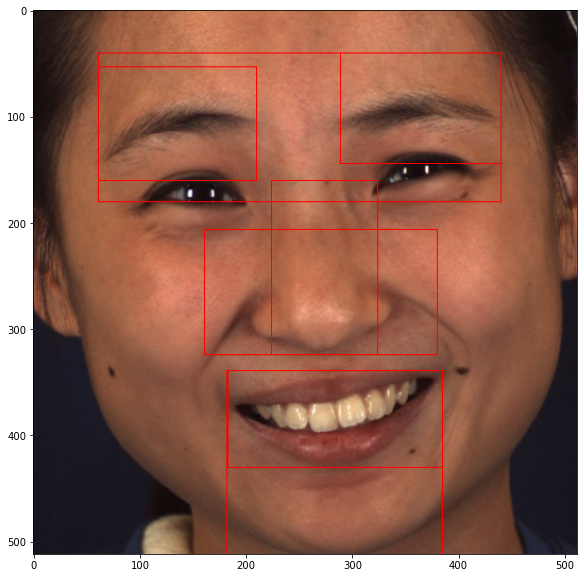

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(image)

In [51]:
df = pd.read_csv('./dataset/BP4D_papercleaned.csv')
row = df.loc[df.path ==path]

In [52]:
row

,Unnamed: 0,participant,1,2,4,6,7,10,12,14,15,17,23,24,path,image_name
52186,52187,F015,1,1,0,1,1,1,1,1,0,0,0,0,BP4D/data/F015/T4/1828.jpg,1828.0
